# Import packages

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import tat_neuro_functions as tnf
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Import Data

In [3]:
df = pd.read_csv('/Users/Greg/Projects/HIV_Neuro_NGS/DataModeling/dataframes/sklearn_preprocessed_df2.csv')
df.head()

,Patient,Visit,Age,Gender,ART,VL,iVL,pVL,CD4,iCD4,...,101F,101P,101S,101T,101W,101Y,101V,log10_VL,log10_iVL,log10_pVL
0,A0001,R09,59.0,Male,on,20.0,987.0,987.0,797.0,400.0,...,0.0,0.000453,0.000356,0.000000,0.000129,0.0,0.001975,1.301030,2.994317,2.994317
1,A0010,R08,59.0,Male,on,20.0,50.0,470.0,1167.0,448.0,...,0.0,0.000000,0.004473,0.001278,0.000000,0.0,0.000000,1.301030,1.698970,2.672098
2,A0012,R02,63.0,Male,on,34.0,2083.0,28550.0,881.0,745.0,...,0.0,0.003399,0.000283,0.000850,0.000000,0.0,0.000142,1.531479,3.318689,4.455606
3,A0013,R09,68.0,Male,on,20.0,144.0,39373.0,771.0,564.0,...,0.0,0.000278,0.003894,0.000278,0.000000,0.0,0.000000,1.301030,2.158362,4.595199
4,A0015,R10,54.0,Male,on,20.0,79074.0,79074.0,561.0,309.0,...,0.0,0.003000,0.000500,0.000400,0.000000,0.0,0.000000,1.301030,4.898034,4.898034


In [4]:
genetic_cols = range(26,len(df.columns)-3)
g_df = tnf.select_dataframe_columns(df, genetic_cols)
print g_df.shape
g_df.head()

(117, 2021)


,GDS,1A,1R,1N,1D,1C,1Q,1E,1G,1H,...,101L,101K,101M,101F,101P,101S,101T,101W,101Y,101V
0,0.583333,0.000213,0.002378,0.00018,0.000049,0.002477,0.000082,0.004051,0.001247,0.0,...,0.001036,0.0,0.0,0.0,0.000453,0.000356,0.000000,0.000129,0.0,0.001975
1,1.416667,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.004473,0.001278,0.000000,0.0,0.000000
2,0.583333,0.000000,0.001640,0.00000,0.000000,0.000547,0.000000,0.000547,0.000547,0.0,...,0.003682,0.0,0.0,0.0,0.003399,0.000283,0.000850,0.000000,0.0,0.000142
3,0.000000,0.000000,0.001629,0.00000,0.000000,0.000000,0.000000,0.001629,0.000000,0.0,...,0.002410,0.0,0.0,0.0,0.000278,0.003894,0.000278,0.000000,0.0,0.000000
4,1.333333,0.000000,0.006211,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.001600,0.0,0.0,0.0,0.003000,0.000500,0.000400,0.000000,0.0,0.000000


# Filter variants

In [5]:
# threshold above %
t1_df = tnf.make_threshold_dataframe(g_df, 0.1)
t5_df = tnf.make_threshold_dataframe(g_df, 0.5)
t9_df = tnf.make_threshold_dataframe(g_df, 0.9)

T1_DF = tnf.filter_genetic_variants(t1_df, 0, 0)
T5_DF = tnf.filter_genetic_variants(t5_df, 0, 0)
T9_DF = tnf.filter_genetic_variants(t9_df, 0, 0)

print T1_DF.shape
print T5_DF.shape
print T9_DF.shape

(117, 421)
(117, 313)
(117, 284)


In [6]:
G_DF = tnf.filter_genetic_variants(g_df, 0.1, 0.1)

In [7]:
# 4 dataframes with genetic data representations
df_list = [G_DF, T1_DF, T5_DF, T9_DF]
for D in df_list:
    print D.shape

(117, 148)
(117, 421)
(117, 313)
(117, 284)


In [8]:
G_DF.head()

,GDS,4V,5N,5D,6P,7R,7K,7S,8L,9E,...,97G,98R,99S,100R,100G,100I,100S,101R,101Q,101P
0,0.583333,0.968241,0.156672,0.804146,0.973759,0.448664,0.004125,0.529251,0.984367,0.823014,...,0.000198,0.982462,0.983271,0.001093,0.979934,0.000000,0.008450,0.446390,0.019262,0.000453
1,1.416667,0.964500,0.004800,0.927600,0.972900,0.970000,0.000000,0.010000,0.980000,1.000000,...,0.000000,0.978899,0.985569,0.004436,0.000000,0.986692,0.000000,0.992971,0.000000,0.000000
2,0.583333,0.970572,0.000000,0.955438,0.977507,0.830586,0.000000,0.159799,0.986245,0.972998,...,0.001682,0.007858,0.964290,0.640842,0.317182,0.001215,0.020651,0.971959,0.000283,0.003399
3,0.000000,0.988281,0.637236,0.345489,0.993115,0.001715,0.982847,0.001715,0.995008,0.367720,...,0.000479,0.465591,0.984030,0.001698,0.466345,0.505408,0.002503,0.985724,0.000093,0.000278
4,1.333333,0.975610,0.000000,0.895161,0.965035,0.986207,0.000000,0.000000,0.993103,0.709459,...,0.000600,0.955800,0.973000,0.003800,0.124700,0.000100,0.001800,0.087000,0.000900,0.003000


# Randomized Lasso (Stabililty Selection)

In [9]:
from sklearn.linear_model import RandomizedLasso

threshold = 0.5
target = 'GDS'
features = list(G_DF.columns)[1:]

X_df, y = tnf.run_genetic_preparation_pipeline(G_DF, features, target, threshold)

print X_df.shape
print y.shape


Cs = np.linspace(0.001,0.05,num=30)
# define randomized lasso model
randomized_lasso = RandomizedLasso(alpha=Cs, scaling=0.5, sample_fraction=0.85, n_resampling=100,
                                   fit_intercept=True, normalize=False, n_jobs=-1, random_state=10)

randomized_lasso.fit(X_df, y)

sum_scores = []
for f, s in zip(features, randomized_lasso.all_scores_):
    sum_scores.append((f, sum(s), s))
ss_df = pd.DataFrame(sum_scores)
ss_df.columns = ['Feature','Sum', 'Scores']
ss_df.sort_values(by='Sum', inplace=True, ascending=False)
ss_df.head()

(117, 147)
(117,)


,Feature,Sum,Scores
77,59P,11.54,"[0.91, 0.92, 0.92, 0.91, 0.88, 0.84, 0.77, 0.7..."
44,36V,11.14,"[0.91, 0.93, 0.94, 0.93, 0.87, 0.83, 0.74, 0.6..."
50,40T,8.29,"[0.95, 0.91, 0.89, 0.82, 0.73, 0.68, 0.56, 0.5..."
103,74H,7.56,"[0.78, 0.83, 0.83, 0.81, 0.72, 0.63, 0.53, 0.4..."
85,63E,7.37,"[0.86, 0.89, 0.8, 0.76, 0.69, 0.62, 0.51, 0.42..."


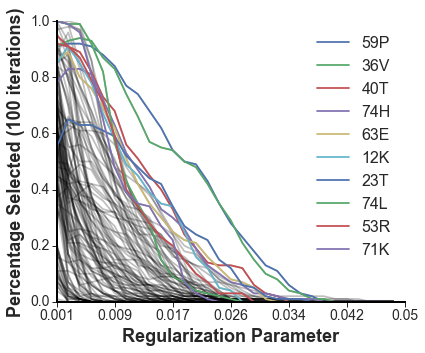

In [28]:
def plot_stab_selection(ss_df, savepath):
    fig,ax = plt.subplots(figsize=[6,5])
    for s in list(ss_df['Scores']):
        ax.plot(s, color='k', alpha=0.25)
    for i,j in ss_df.iloc[:10].iterrows():
        ax.plot(j['Scores'], label=j['Feature'])
    ax.legend(fontsize=16)
    
    # formatting colors and axes
    ax.set_axis_bgcolor('white')
    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(2)
    
    ax.set_ylabel('Percentage Selected (100 iterations)', weight='bold', fontsize=18)
    ax.set_xlabel('Regularization Parameter', weight='bold', fontsize=18)
    #ax.set_xticks(np.arange(0, 110, 11))
    ax.set_xticklabels([round(a,3) for a in np.linspace(0.001,0.05,num=7)])
    ax.tick_params(axis='x', labelsize=14, length=5)
    ax.tick_params(axis='y', labelsize=14, length=5)
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()
    
    fig.tight_layout()
    plt.show()
    fig.savefig(savepath,dpi=300,bbox_inches='tight')

savepath = '/Users/Greg/Projects/HIV_Neuro_NGS/Figures/genetic_lasso.png'
plot_stab_selection(ss_df, savepath)

# Genetic Model Performance

In [11]:
G_DF.head()

,GDS,4V,5N,5D,6P,7R,7K,7S,8L,9E,...,97G,98R,99S,100R,100G,100I,100S,101R,101Q,101P
0,0.583333,0.968241,0.156672,0.804146,0.973759,0.448664,0.004125,0.529251,0.984367,0.823014,...,0.000198,0.982462,0.983271,0.001093,0.979934,0.000000,0.008450,0.446390,0.019262,0.000453
1,1.416667,0.964500,0.004800,0.927600,0.972900,0.970000,0.000000,0.010000,0.980000,1.000000,...,0.000000,0.978899,0.985569,0.004436,0.000000,0.986692,0.000000,0.992971,0.000000,0.000000
2,0.583333,0.970572,0.000000,0.955438,0.977507,0.830586,0.000000,0.159799,0.986245,0.972998,...,0.001682,0.007858,0.964290,0.640842,0.317182,0.001215,0.020651,0.971959,0.000283,0.003399
3,0.000000,0.988281,0.637236,0.345489,0.993115,0.001715,0.982847,0.001715,0.995008,0.367720,...,0.000479,0.465591,0.984030,0.001698,0.466345,0.505408,0.002503,0.985724,0.000093,0.000278
4,1.333333,0.975610,0.000000,0.895161,0.965035,0.986207,0.000000,0.000000,0.993103,0.709459,...,0.000600,0.955800,0.973000,0.003800,0.124700,0.000100,0.001800,0.087000,0.000900,0.003000


In [60]:
feats = []
top10 = list(ss_df.Feature)[:10]
#feats.append([top50[0]])
for i in range(1,len(top10)+1):
    feats.append(top10[0:i])

for _ in feats:
    print len(_),

1 2 3 4 5 6 7 8 9 10


In [76]:
target = 'GDS'
threshold = 0.5
folds = 5
#features = f4

# record data for different feature sets
D = []

for features in feats:
    print len(features), features[-1]

    # record data for different regularization ############################################
    AUC1, AUC2 = [], []
    PREC1, PREC2 = [], []
    REC1, REC2 = [], []
    F1, F2 = [], []
    TPR1, TPR2 = [], []
    FPR1, FPR2 = [], []
    COEF1, COEF2 = [], []

    # iterate through regularization parameters
    reg_coeffs = list(10.0**np.arange(3,-4,-1))
    for rc in reg_coeffs:
        print rc

        # ridge model
        ridge_model = LogisticRegression(penalty='l2',solver='liblinear',fit_intercept=True,
                                         C=1, class_weight='balanced', n_jobs=-1)

        # shuffle and analyze the dataframe 1000 times ####################################
        auc1, auc2 = [], []
        prec1, prec2 = [], []
        rec1, rec2 = [], []
        f1, f2 = [], []
        tpr1, tpr2 = [], []
        fpr1, fpr2 = [], []
        coef1, coef2 = [], []

        for _ in range(10):

            # shuffle the dataframe
            df_shuffled = tnf.shuffle_dataframe(G_DF)

            # select 100 samples from the shuffled dataframe
            # prepare the dataframe for sklearn
            X_df, y = tnf.run_genetic_preparation_pipeline(df_shuffled[:100], features, target, threshold)

            # run k-fold cross validation
            #lasso_metrics = tnf.get_CV_metrics(lasso_model, X_df[features], y, folds)
            ridge_metrics = tnf.get_CV_metrics(ridge_model, X_df[features], y, folds)

            # append data for each random sample 
            # ridge metrics
            auc2.append(np.mean(ridge_metrics['AUC']))
            prec2.append(np.mean(ridge_metrics['Precision']))
            rec2.append(np.mean(ridge_metrics['Recall']))
            f2.append(np.mean(ridge_metrics['F1']))
            tpr2.append(ridge_metrics['meanTPR'])
            fpr2.append(ridge_metrics['meanFPR'])
            coef2.append(ridge_metrics['Coef'])

        #append results for each model
        AUC2.append(auc2)
        PREC2.append(prec2)
        REC2.append(rec2)
        F2.append(f2)
        TPR2.append(tpr2) 
        FPR2.append(fpr2) 
        COEF2.append(coef2)

    # append to overall data
    #D = {'Features':features,'AUC':AUC2}
    D.append([features, AUC2])

1 59P
1000.0
100.0
10.0
1.0
0.1
0.01
0.001
2 36V
1000.0
100.0
10.0
1.0
0.1
0.01
0.001
3 40T
1000.0
100.0
10.0
1.0
0.1
0.01
0.001
4 74H
1000.0
100.0
10.0
1.0
0.1
0.01
0.001
5 63E
1000.0
100.0
10.0
1.0
0.1
0.01
0.001
6 12K
1000.0
100.0
10.0
1.0
0.1
0.01
0.001
7 23T
1000.0
100.0
10.0
1.0
0.1
0.01
0.001
8 74L
1000.0
100.0
10.0
1.0
0.1
0.01
0.001
9 53R
1000.0
100.0
10.0
1.0
0.1
0.01
0.001
10 71K
1000.0
100.0
10.0
1.0
0.1
0.01
0.001


In [83]:
ALL_M = []
ALL_S = []
for feat_set in D:
    #print feat_set[0]
    M = []
    S = []
    for reg_set in feat_set[1]:
        m = np.mean(reg_set)
        s = np.std(reg_set)
        M.append(m)
        S.append(s)
    ALL_M.append(M)
    ALL_S.append(S)
        
M_DF = pd.DataFrame(ALL_M)
S_DF = pd.DataFrame(ALL_S)

print M_DF.shape[0]
M_DF.head()

10


,0,1,2,3,4,5,6
0,0.5694,0.5640,0.5352,0.5554,0.5724,0.5426,0.5608
1,0.6374,0.6438,0.6436,0.6448,0.6458,0.6426,0.6384
2,0.6480,0.6524,0.6616,0.6296,0.6478,0.6414,0.6560
3,0.6158,0.6212,0.5882,0.6250,0.6246,0.6280,0.5910
4,0.6480,0.6186,0.6146,0.6042,0.6236,0.6228,0.6140


0
0.6646
1
0.6762
2
0.6746
3
0.6836
4
0.6684
5
0.6892
6
0.6774


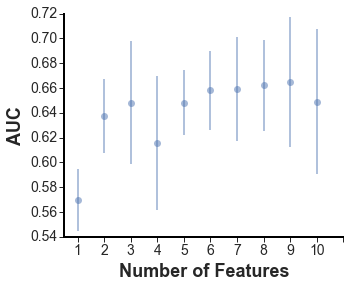

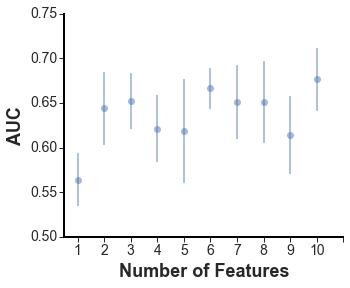

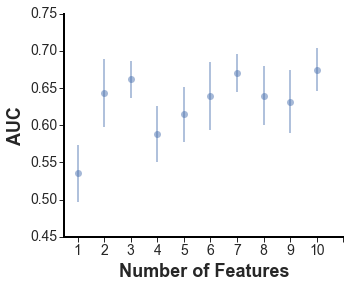

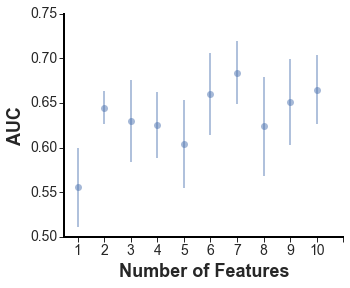

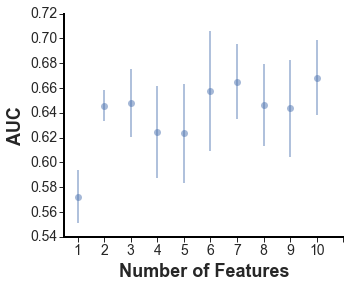

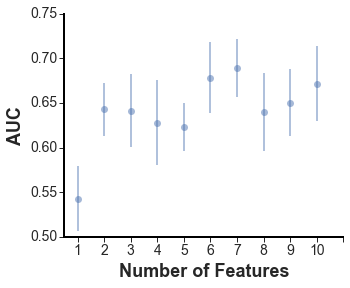

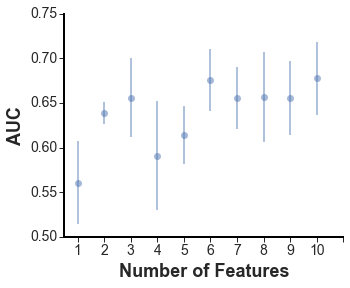

In [92]:
for i in range(M_DF.shape[1]):
    fig, ax = plt.subplots(figsize=(5,4))
    print i
    x = np.arange(0,M_DF.shape[0],1)
    y = M_DF[i]
    print np.max(y)
    ye = S_DF[i]
    ax.errorbar(x+0.5, y, yerr=ye, fmt='o', alpha=0.5)

    ax.set_axis_bgcolor('white')
    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(2)

    ax.set_ylabel('AUC', weight='bold', fontsize=18)
    ax.set_xlabel('Number of Features', weight='bold', fontsize=18)
    ax.set_xticks(np.linspace(0.5,10.5,num=11))
    ax.set_xticklabels([int(a) for a in np.linspace(1,10,num=10)])
    ax.tick_params(axis='x', labelsize=14, length=5)
    ax.tick_params(axis='y', labelsize=14, length=5)
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()
    #ax[i].plot(S_DF[i])

3
0.6836


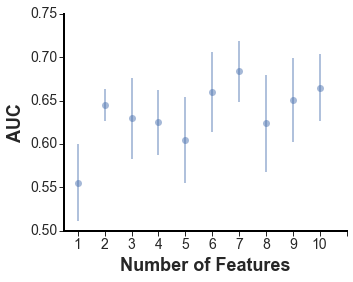

In [96]:
i=3
fig, ax = plt.subplots(figsize=(5,4))
print i
x = np.arange(0,M_DF.shape[0],1)
y = M_DF[i]
print np.max(y)
ye = S_DF[i]
ax.errorbar(x+0.5, y, yerr=ye, fmt='o', alpha=0.5)

ax.set_axis_bgcolor('white')
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)

ax.set_ylabel('AUC', weight='bold', fontsize=18)
ax.set_xlabel('Number of Features', weight='bold', fontsize=18)
ax.set_xticks(np.linspace(0.5,10.5,num=11))
ax.set_xticklabels([int(a) for a in np.linspace(1,10,num=10)])
ax.tick_params(axis='x', labelsize=14, length=5)
ax.tick_params(axis='y', labelsize=14, length=5)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

savepath = '/Users/Greg/Projects/HIV_Neuro_NGS/Figures/number_genetic_features_1.png'
fig.tight_layout()
plt.show()
fig.savefig(savepath,dpi=300,bbox_inches='tight')

In [15]:
print reg_coeffs

[1000.0, 100.0, 10.0, 1.0, 0.10000000000000001, 0.01, 0.001]


In [52]:
D[14][0]

['59P',
 '36V',
 '40T',
 '74H',
 '63E',
 '12K',
 '23T',
 '74L',
 '53R',
 '71K',
 '29K',
 '97D',
 '93E',
 '98R',
 '7S']

# ROC PLOTS

In [17]:
df = pd.read_csv('/Users/Greg/Projects/HIV_Neuro_NGS/DataModeling/dataframes/sklearn_preprocessed_df2.csv')
df.head()

,Patient,Visit,Age,Gender,ART,VL,iVL,pVL,CD4,iCD4,...,101F,101P,101S,101T,101W,101Y,101V,log10_VL,log10_iVL,log10_pVL
0,A0001,R09,59.0,Male,on,20.0,987.0,987.0,797.0,400.0,...,0.0,0.000453,0.000356,0.000000,0.000129,0.0,0.001975,1.301030,2.994317,2.994317
1,A0010,R08,59.0,Male,on,20.0,50.0,470.0,1167.0,448.0,...,0.0,0.000000,0.004473,0.001278,0.000000,0.0,0.000000,1.301030,1.698970,2.672098
2,A0012,R02,63.0,Male,on,34.0,2083.0,28550.0,881.0,745.0,...,0.0,0.003399,0.000283,0.000850,0.000000,0.0,0.000142,1.531479,3.318689,4.455606
3,A0013,R09,68.0,Male,on,20.0,144.0,39373.0,771.0,564.0,...,0.0,0.000278,0.003894,0.000278,0.000000,0.0,0.000000,1.301030,2.158362,4.595199
4,A0015,R10,54.0,Male,on,20.0,79074.0,79074.0,561.0,309.0,...,0.0,0.003000,0.000500,0.000400,0.000000,0.0,0.000000,1.301030,4.898034,4.898034


In [101]:
# features
#f1 = ['30C','31C'] # baseline
f10 = ['59P', '36V', '40T', '74H', '63E', '12K','23T','74L','53R','71K']
#'29K','97D','93E', '98R','7S'] # current status by traditional metrics
f7 = ['59P', '36V', '40T', '74H', '63E', '12K','23T']
f2 = ['59P', '36V'] # current status by traditional metrics
#f4 = ['log10_pVL','nCD4','log10_VL','CD4','TMHDS'] # all 5 traditional features
final_feats = [f7, f2]

In [102]:
target = 'GDS'
threshold = 0.5
folds = 5
#features = f4

# record data for different feature sets
AUC1, AUC2 = [], []
PREC1, PREC2 = [], []
REC1, REC2 = [], []
F1, F2 = [], []
TPR1, TPR2 = [], []
FPR1, FPR2 = [], []
COEF1, COEF2 = [], []

for features in final_feats:
    print features

    # ridge model
    ridge_model = LogisticRegression(penalty='l2',solver='liblinear',fit_intercept=True,
                                     C=1, class_weight='balanced', n_jobs=-1)

    # shuffle and analyze the dataframe 100 times ####################################
    auc1, auc2 = [], []
    prec1, prec2 = [], []
    rec1, rec2 = [], []
    f1, f2 = [], []
    tpr1, tpr2 = [], []
    fpr1, fpr2 = [], []
    coef1, coef2 = [], []

    for _ in range(100):

        # shuffle the dataframe
        df_shuffled = tnf.shuffle_dataframe(df)

        # select 100 samples from the shuffled dataframe
        # prepare the dataframe for sklearn
        X_df, y = tnf.run_genetic_preparation_pipeline(df_shuffled[:100], features, target, threshold)

        # run k-fold cross validation
        ridge_metrics = tnf.get_CV_metrics(ridge_model, X_df[features], y, folds)

        # append data for each random sample 
        # ridge metrics
        auc2.append(np.mean(ridge_metrics['AUC']))
        prec2.append(np.mean(ridge_metrics['Precision']))
        rec2.append(np.mean(ridge_metrics['Recall']))
        f2.append(np.mean(ridge_metrics['F1']))
        tpr2.append(ridge_metrics['meanTPR'])
        fpr2.append(ridge_metrics['meanFPR'])
        coef2.append(ridge_metrics['Coef'])

    #append results for each model
    AUC2.append(auc2)
    PREC2.append(prec2)
    REC2.append(rec2)
    F2.append(f2)
    TPR2.append(tpr2) 
    FPR2.append(fpr2) 
    COEF2.append(coef2)

['59P', '36V', '40T', '74H', '63E', '12K', '23T']
['59P', '36V']


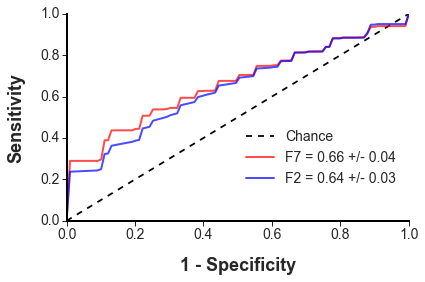

In [105]:
# iterate through the combinations of features

fig,ax=plt.subplots(figsize=(6,4))

# formatting
ax.tick_params(axis='x', labelsize=14, length=5)
ax.tick_params(axis='y', labelsize=14, length=5)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_xlabel('1 - Specificity', size=18, labelpad=15, weight='bold')
ax.set_ylabel('Sensitivity', size=18, labelpad=15, weight='bold')
ax.set_axis_bgcolor('white')
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.ticklabel_format(size=20)
ax.plot([0, 1], [0, 1], ls='--', color='black', label='Chance')
clrs = ['red','blue','green','purple','orange','deeppink','aqua','gold','lime','sienna']

for j in range(len(final_feats)):
    nfl=[7,2]
    # returns a list of arrays
    f = FPR2[j]
    t = TPR2[j]
    a = str(round(np.mean(AUC2[j]),2))
    b = str(round(np.std(AUC2[j]),2))
    
    # initialize a mean TRP and FPR
    X = np.zeros(len(f[0]))
    Y = np.zeros(len(t[0]))
    # iterate through each randomization
    for i in range(len(t)):
        X = X + f[i]
        Y = Y + t[i]
    X = X/len(t)
    Y = Y/len(t)
    ax.plot(X, Y, color=clrs[j], ls='-', label='F'+str(nfl[j])+' = '+a+' +/- '+b, linewidth=2, alpha=0.7)
    #ax.plot(X, Y, color=clrs[j], ls='-', label=label_names[j]+' = '+a+' +/- '+b, linewidth=2, alpha=0.7)

fig.tight_layout()
plt.legend(bbox_to_anchor=[1, 0.5],ncol=1,fontsize=14)
plt.show()

savepath = '/Users/Greg/Projects/HIV_Neuro_NGS/Figures/genetic_roc_curves.png'
fig.savefig(savepath,dpi=300,bbox_inches='tight')

# Feature Directions

In [21]:
print len(COEF2)
print len(COEF2[0])
print len(COEF2[0][0])
print len(COEF2[0][0][0])
print len(COEF2[0][0][0][0])

3
100
5
1
2


In [22]:
print COEF2[0][0]

[array([[ 0.02269828, -0.14699908]]), array([[-0.0345567 , -0.02901745]]), array([[ 0.00699851, -0.07944892]]), array([[ 0.0441533 , -0.09008717]]), array([[ 0.03213355, -0.12480458]])]


In [106]:


coeff_dict_list = []

i=0
for feature_group in COEF2:
    #print len(feature_group)
    cv_mean_list = []
    for cv_group in feature_group:
        cv_mean = np.mean(cv_group,0)
        #print len(cv_group), cv_mean
        cv_mean_list.append(cv_mean)
    #print len(cv_mean_list), len(cv_mean_list[0][0])
    F = final_feats[i]
    print F
    S = np.mean(cv_mean_list,0)[0]
    Z = zip(F,S)
    coeff_dict_list.append(dict(Z))
    i+=1
    
coeff_dict_list

['59P', '36V', '40T', '74H', '63E', '12K', '23T']
['59P', '36V']


[{'12K': 0.97517397556638585,
  '23T': -0.61955623164019114,
  '36V': -0.86351734021399862,
  '40T': -0.4938241850199554,
  '59P': 0.69077214195811831,
  '63E': -0.42620207986929942,
  '74H': 0.42805446223216798},
 {'36V': -0.86702215775413605, '59P': 0.65126349698679076}]

In [107]:
coeff_dict_list = []

i=0
for feature_group in COEF2:
    #print len(feature_group)
    cv_mean_list = []
    for cv_group in feature_group:
        cv_mean = np.mean(cv_group,0)
        #print len(cv_group), cv_mean
        cv_mean_list.append(cv_mean)
    #print len(cv_mean_list), len(cv_mean_list[0][0])
    F = final_feats[i]
    S = np.mean(cv_mean_list,0)[0]
    Z = zip(F,S)
    coeff_dict_list.append(dict(Z))
    i+=1

X = []
VARS = ['59P', '36V', '40T', '74H', '63E', '12K', '23T']
for A in coeff_dict_list:
    x = []
    for V in VARS:
        if V in A.keys():
            x.append(A[V])
        else:
            x.append(np.nan)
    X.append(x)

coeff_df = pd.DataFrame(X)
coeff_df.columns = VARS
coeff_df.T

,0,1
59P,0.690772,0.651263
36V,-0.863517,-0.867022
40T,-0.493824,NaN
74H,0.428054,NaN
63E,-0.426202,NaN
12K,0.975174,NaN
23T,-0.619556,NaN


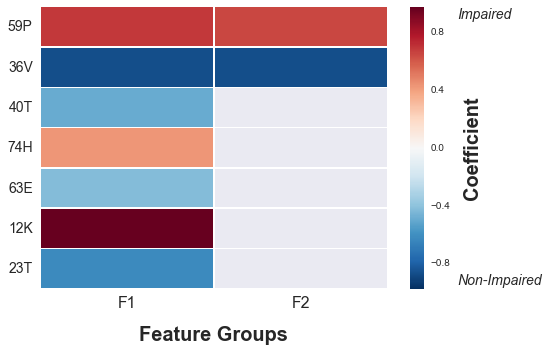

In [121]:
fig,ax = plt.subplots(figsize=(7,5))
ax = sns.heatmap(coeff_df.T, linewidths=.5)
VARS = ['59P', '36V', '40T', '74H', '63E', '12K', '23T']
ax.set_yticklabels(VARS[::-1],fontsize=14, rotation=0)
ax.set_xticklabels(['F1', 'F2', 'F3'], fontsize=16)
ax.set_xlabel('Feature Groups', labelpad=15, fontsize=20, weight='bold')
ax.yaxis.set_label_position('right')
ax.set_ylabel('Coefficient', fontsize=20, weight='bold', labelpad=75)

ax.text(2.4,0.1,'Non-Impaired',fontsize=14,fontstyle='italic')
ax.text(2.4,6.7,'Impaired',fontsize=14,fontstyle='italic')
fig.tight_layout()
plt.show()

savepath = '/Users/Greg/Projects/HIV_Neuro_NGS/Figures/genetic_roc_coeff.png'
fig.savefig(savepath,dpi=300, bbox_inches='tight')

In [26]:
VARS[::-1]

['93E',
 '97D',
 '29K',
 '71K',
 '53R',
 '74L',
 '23T',
 '12K',
 '63E',
 '74H',
 '40T',
 '36V',
 '59P',
 '31C',
 '30C']